In [1]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import matplotlib.pyplot as plt
import time

from utils import RandomSeedResetter
RandomSeedResetter.reset_random_seed(0)

In [2]:
input_train = np.load('data/lorenz/input_train_shuffle.npy')
input_valid = np.load('data/lorenz/input_valid.npy')
input_test = np.load('data/lorenz/input_test.npy')

output_train = np.load('data/lorenz/output_train_shuffle.npy')
output_valid = np.load('data/lorenz/output_valid.npy')
output_test = np.load('data/lorenz/output_test.npy')

_esn_train = np.load('data/esn_lorenz/log_esn_train_shuffle_norm.npy')
_esn_valid = np.load('data/esn_lorenz/log_esn_valid_norm.npy')
_esn_test = np.load('data/esn_lorenz/log_esn_test_norm.npy')

DIM_INPUT = len(input_train[0, 0, :])
DIM_OUTPUT = len(output_train[0, :])

SIZE_LEAK = len(_esn_train[:])
SIZE_DEEP_ESN = len(_esn_train[0, 0, :])
SIZE_VARIABLE = SIZE_LEAK*SIZE_DEEP_ESN

SIZE_TRAIN = len(input_train[:])
SIZE_VALID = len(input_valid[:])
SIZE_TEST = len(input_test[:])

esn_train = np.zeros((SIZE_TRAIN, SIZE_VARIABLE))
esn_valid = np.zeros((SIZE_VALID, SIZE_VARIABLE))
esn_test = np.zeros((SIZE_VALID, SIZE_VARIABLE))
for idx in range(SIZE_LEAK):
    esn_train[:, idx*SIZE_DEEP_ESN:(idx+1)*SIZE_DEEP_ESN] = _esn_train[idx, :, :]
    esn_valid[:, idx*SIZE_DEEP_ESN:(idx+1)*SIZE_DEEP_ESN] = _esn_valid[idx, :, :]
    esn_test[:, idx*SIZE_DEEP_ESN:(idx+1)*SIZE_DEEP_ESN] = _esn_test[idx, :]

In [3]:
X_train_const = np.zeros((SIZE_TRAIN, SIZE_VARIABLE+DIM_INPUT+1))
X_train_const[:, 0] = np.ones((SIZE_TRAIN))
X_train_const[:, 1:DIM_INPUT+1] = input_train[:, -1, :]
X_train_const[:, DIM_INPUT+1:] = esn_train[:, :]

X_valid_const = np.zeros((SIZE_VALID, SIZE_VARIABLE+DIM_INPUT+1))
X_valid_const[:, 0] = np.ones((SIZE_VALID))
X_valid_const[:, 1:DIM_INPUT+1] = input_valid[:, -1, :]
X_valid_const[:, DIM_INPUT+1:] = esn_valid[:, :]

alpha = np.zeros((10))

In [4]:
model_ridge = []
mse_valid_ridge = np.zeros((10))
for idx in range(10):
    time_init = time.time()
    alpha[idx] = 10**(0.25*idx-7.75)

    model_ridge.append(Ridge(alpha=alpha[idx]))
    model_ridge[idx].fit(X_train_const[:, :], output_train[:, :])

    output_valid_ridge = model_ridge[idx].predict(X_valid_const[:, :])
    error_valid = output_valid[:, :] - output_valid_ridge[:, :]
    mse_valid_ridge[idx] = np.average(error_valid[:, :]**2)
    time_end = time.time()
    print('The index:', idx)
    print('{:.1f}'.format((time_end-time_init)/60), 'min')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.10727e-17): result may not be accurate.
  overwrite_a=True).T


The index: 0
0.4 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.06786e-17): result may not be accurate.
  overwrite_a=True).T


The index: 1
0.3 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.76245e-17): result may not be accurate.
  overwrite_a=True).T


The index: 2
0.3 min
The index: 3
0.3 min
The index: 4
0.3 min
The index: 5
0.3 min
The index: 6
0.3 min
The index: 7
0.3 min
The index: 8
0.3 min
The index: 9
0.3 min


In [18]:
model_lasso = []
mse_valid_lasso = np.zeros((10))
for idx in range(10):
    time_init = time.time()
    alpha[idx] = 10**(0.25*idx-7.75)

    model_lasso.append(Lasso(alpha=alpha[idx], max_iter=5))
    model_lasso[idx].fit(X_train_const[:, :], output_train[:, :])

    output_valid_lasso = model_lasso[idx].predict(X_valid_const[:, :])
    error_valid = output_valid[:, :] - output_valid_lasso[:, :]
    mse_valid_lasso[idx] = np.average(error_valid[:, :]**2)
    time_end = time.time()
    print('The index:', idx)
    print('{:.1f}'.format((time_end-time_init)/60), 'min')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.43511634422475, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2087.8637631883166, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3350.032253979753, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3842.26

The index: 0
1.4 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.42824516012575, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2087.849925728237, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3350.0184548862535, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3842.25

The index: 1
1.3 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.41601785332585, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2087.825314062003, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3349.9939118258944, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3842.22

The index: 2
1.3 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.3942527591387, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2087.781539527416, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3349.950254800731, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3842.1854

The index: 3
1.3 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.3554744927325, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2087.7036386998634, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3349.8726218519387, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3842.11

The index: 4
1.3 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.286309246869, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2087.5649115729743, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3349.734402073254, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3841.9800

The index: 5
1.3 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.16257916277993, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2087.317796342723, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3349.4883044124354, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3841.74

The index: 6
1.3 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463.9403080704175, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2086.8768493513635, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3349.0501864541498, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3841.32

The index: 7
1.3 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463.5376053723287, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2086.0862691123957, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3348.266113119525, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3840.583

The index: 8
1.3 min


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462.81639700780056, tolerance: 0.9210491074983804
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2084.6663345951893, tolerance: 0.9218252856143125
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3346.860649001095, tolerance: 0.9226540567831919
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3839.24

The index: 9
1.3 min


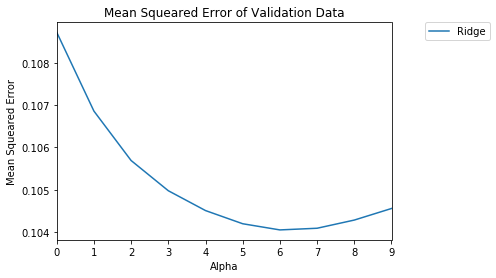

In [7]:
plt.figure()
plt.title('Mean Squeared Error of Validation Data')
plt.ylabel('Mean Squeared Error')
plt.xlabel('Alpha')

plt.plot(mse_valid_ridge[:], label='Ridge')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, 9)
plt.show()

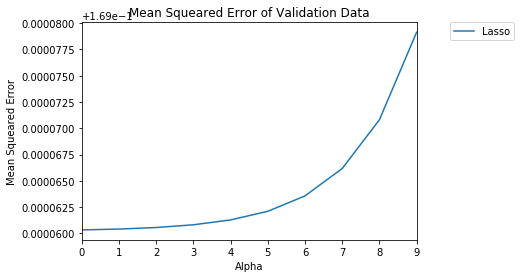

In [20]:
plt.figure()
plt.title('Mean Squeared Error of Validation Data')
plt.ylabel('Mean Squeared Error')
plt.xlabel('Alpha')

plt.plot(mse_valid_lasso[:], label='Lasso')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, 9)
plt.show()

In [9]:
mse_test_all = np.load('result/all/mse_test_all.npy')
output_test_all = np.load('result/all/output_test_all.npy')

'''
X_test_const = np.zeros((SIZE_TEST, SIZE_VARIABLE+DIM_INPUT+1))
X_test_const[:, 0] = np.ones((SIZE_TEST))
X_test_const[:, 1:DIM_INPUT+1] = input_test[:, -1, :]
X_test_const[:, DIM_INPUT+1:] = esn_test[:, :]

model_linear = LinearRegression()
model_linear.fit(X_train_const[:, :], output_train[:, :])

output_test_all = model_linear.predict(X_test_const[:, :])
error_test_all = output_test[:, :] - output_test_all[:, :]
mse_test_all = np.average(error_test_all[:, :]**2, axis=0)
'''

In [10]:
output_test_ridge = model_ridge[6].predict(X_test_const[:, :])
error_test_ridge = output_test[:, :] - output_test_ridge[:, :]
mse_test_ridge = np.average(error_test_ridge[:, :]**2, axis=0)

In [21]:
output_test_lasso = model_lasso[0].predict(X_test_const[:, :])
error_test_lasso = output_test[:, :] - output_test_lasso[:, :]
mse_test_lasso = np.average(error_test_lasso[:, :]**2, axis=0)

In [12]:
mse_test_mlp = np.load('result/mlp_lorenz/mse_test_mlp.npy')
mse_test_rnn = np.load('result/mlp_lorenz/mse_test_rnn.npy')
mse_test_lstm = np.load('result/mlp_lorenz/mse_test_lstm.npy')
mse_test_gru = np.load('result/mlp_lorenz/mse_test_gru.npy')

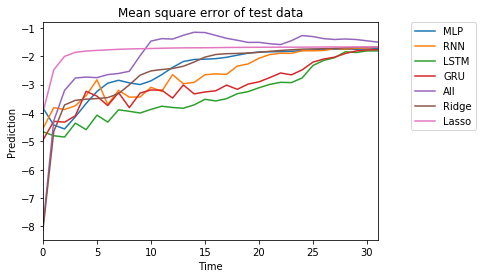

In [22]:
# Plot training & validation loss values
plt.figure()
plt.title('Mean square error of test data')

plt.ylabel('Prediction')
plt.xlabel('Time')

plt.plot(np.log(mse_test_mlp[:]), label='MLP')
plt.plot(np.log(mse_test_rnn[:]), label='RNN')
plt.plot(np.log(mse_test_lstm[:]), label='LSTM')
plt.plot(np.log(mse_test_gru[:]), label='GRU')
plt.plot(np.log(mse_test_all), label='All')
plt.plot(np.log(mse_test_ridge), label='Ridge')
plt.plot(np.log(mse_test_lasso), label='Lasso')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, DIM_OUTPUT-1)
plt.show()

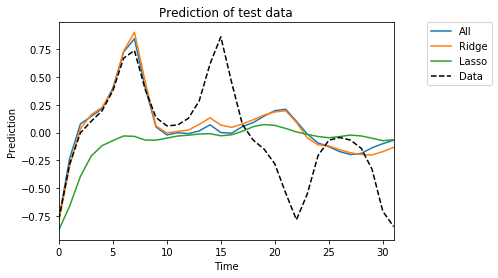

In [23]:
plt.figure()
plt.title('Prediction of test data')

plt.ylabel('Prediction')
plt.xlabel('Time')

idx = 0
plt.plot(output_test_all[idx, :], label='All')
plt.plot(output_test_ridge[idx, :], label='Ridge')
plt.plot(output_test_lasso[idx, :], label='Lasso')
plt.plot(output_test[idx, :], label='Data', color='black', linestyle='dashed')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, DIM_OUTPUT-1)
plt.show()

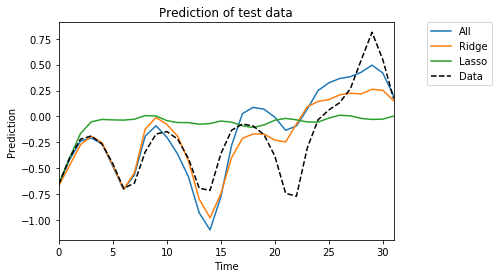

In [24]:
plt.figure()
plt.title('Prediction of test data')

plt.ylabel('Prediction')
plt.xlabel('Time')

idx = SIZE_TEST-1
plt.plot(output_test_all[idx, :], label='All')
plt.plot(output_test_ridge[idx, :], label='Ridge')
plt.plot(output_test_lasso[idx, :], label='Lasso')
plt.plot(output_test[idx, :], label='Data', color='black', linestyle='dashed')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, DIM_OUTPUT-1)
plt.show()

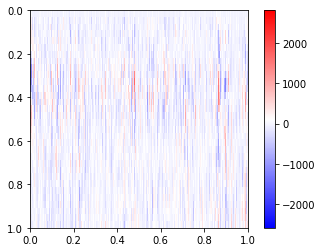

In [16]:
plt.figure()
plt.imshow(model_ridge[6].coef_[:, :], extent=(0,1, 1,0), cmap='bwr', interpolation='nearest')
plt.colorbar()
plt.show()

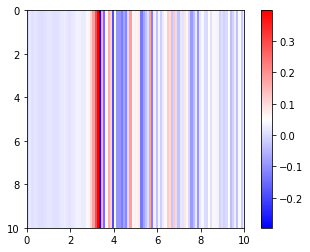

In [74]:
plt.figure()
plt.imshow(model_lasso[0].coef_[0:1, 0:100], extent=(0,10, 10,0), cmap='bwr', interpolation='nearest')
plt.colorbar()
plt.show()

In [19]:
np.save('result/all/mse_test_all.npy', mse_test_all)
np.save('result/all/output_test_all.npy', output_test_all)
np.save('result/ridge/mse_test_ridge.npy', mse_test_ridge)
np.save('result/ridge/output_test_ridge.npy', output_test_ridge)
np.save('result/lasso/mse_test_lasso.npy', mse_test_lasso)
np.save('result/lasso/output_test_lasso.npy', output_test_lasso)